In [30]:
import numpy as np
import scipy.special
import matplotlib.pyplot



class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        self.lr=learningrate
        
        self.wih=(np.random.normal(0, pow(self.hnodes,-0.5),(self.hnodes, self.inodes)))
        self.who=(np.random.normal(0, pow(self.onodes,-0.5),(self.onodes, self.hnodes)))
        
        self.actfunction= lambda x: scipy.special.expit(x)
        pass
   
    
    def train(self, inputs_list, targets_list):
        
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        
        hidden_inputs=np.dot(self.wih,inputs)
        hidden_outputs=self.actfunction(hidden_inputs)
        
        final_inputs=np.dot(self.who,hidden_outputs)
        final_outputs=self.actfunction(final_inputs)
       
        output_errors=targets-final_outputs
        
        hidden_errors=np.dot(self.who.T,output_errors)
        
        self.who+=self.lr*np.dot((output_errors*final_outputs*(1-final_outputs)),np.transpose(hidden_outputs))
        self.wih+=self.lr*np.dot((hidden_errors*hidden_outputs*(1-hidden_outputs)),np.transpose(inputs))
        
        pass
    
    
    def query(self, inputs_list):
        inputs=np.array(inputs_list,ndmin=2).T
        
        hidden_inputs=np.dot(self.wih,inputs)
        hidden_outputs=self.actfunction(hidden_inputs)
        
        final_inputs=np.dot(self.who,hidden_outputs)
        final_outputs=self.actfunction(final_inputs)
        
        return final_outputs

In [32]:
##number of input,hidden,output nodes
input_nodes=784
hidden_nodes=100
output_nodes=10

#learning rate\
learning_rate=0.3

#create instance
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

#read training data set
training_data_file=open(r'C:\Users\hanzh\Desktop\mnist_train.csv','r')
training_data_list=training_data_file.readlines()
training_data_file.close()

#training for e time
e=1
for e in range(e):
    for trainingdata in training_data_list:
        all_values=trainingdata.split(',')
        inputs=(np.asfarray(all_values[1:])/255*0.99)+0.01
        targets=np.zeros(output_nodes)+0.01
        #set targets probability to 0.99
        targets[int(all_values[0])]=0.99
        n.train(inputs,targets)
        pass
    pass

In [33]:
test_file=open(r'C:\Users\hanzh\Desktop\mnist_test_10.csv.txt','r')
test_list=test_file.readlines()
test_file.close()

In [6]:
len(test_list)

10

In [3]:
data_list

['7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0

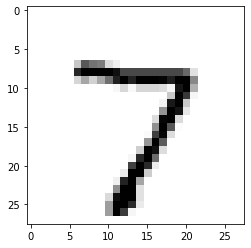

In [22]:
import matplotlib.pyplot
all_values=data_list[0].split(',')
image_array=np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')

In [39]:
score_card=[]
for testdata in test_list:
    all_values=testdata.split(',')
    
    #correct answer
    print(int(all_values[0]),'Correct Answer')
    
    # test
    inputs=(np.asfarray(all_values[1:])/255*0.99)+0.01
    outputs=n.query(inputs)
    
    #result
    label=np.argmax(outputs)
    print(label,'predict')
    
    
    if label==int(all_values[0]):
        score_card.append(1)
    else:
        score_card.append(0)
    pass

7 Correct Answer
7 predict
2 Correct Answer
2 predict
1 Correct Answer
1 predict
0 Correct Answer
0 predict
4 Correct Answer
4 predict
1 Correct Answer
1 predict
4 Correct Answer
4 predict
9 Correct Answer
9 predict
5 Correct Answer
5 predict
9 Correct Answer
9 predict


In [43]:
print(score_card)
print('performace',sum(score_card)/len(score_card))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
performace 1.0
